In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA



In [23]:

# read data
ndvi_path="lucas_soil_ndvi_new8_postive.csv"
ci_path="lucas_soil_CI_new8_postive.csv"
ndmi_path="lucas_soil_ndmi_new8_postive.csv"
ndvi_df=pd.read_csv(ndvi_path)
ci_df=pd.read_csv(ci_path)
ndmi_df=pd.read_csv(ndmi_path)

# drop rows with missing values
ndvi_df = ndvi_df.dropna(subset=['Mean'])
ci_df = ci_df.dropna(subset=['Mean'])
ndmi_df = ndmi_df.dropna(subset=['Mean'])

ndvi_df['date'] = pd.to_datetime(ndvi_df['date'])
ndvi_df['month'] = ndvi_df['date'].dt.month



In [24]:
# Create a dataframe for PCA
df = pd.DataFrame()  # Define the variable df

df["CI_mean"] = ci_df["Mean"]
df["ndvi_mean"] = ndvi_df["Mean"]
df["ndmi_mean"] = ndmi_df["Mean"]
df["month"] = ndvi_df["month"]
df["N_level"] = ""  # Initialize the 'N_level' column

df["N"] = ci_df["N"]
df = df.dropna(subset=['ndvi_mean'])
df = df.dropna(subset=['ndmi_mean'])

# set up high and low Nitrogen

for i in range(len(df)):
    if df["N"].iloc[i] >= 2:
        df["N_level"].iloc[i] = 2

    elif df["N"].iloc[i] >= 1.2 :
        df["N_level"].iloc[i] = 1
            
    else:
        df["N_level"].iloc[i] = 0



C:\Users\Jacob\AppData\Local\Temp\ipykernel_29024\4148388388.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["N_level"].iloc[i] = 1
C:\Users\Jacob\AppData\Local\Temp\ipykernel_29024\4148388388.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["N_level"].iloc[i] = 0
C:\Users\Jacob\AppData\Local\Temp\ipykernel_29024\4148388388.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["N_level"].iloc[i] = 0
C:\Users\Jacob\AppD

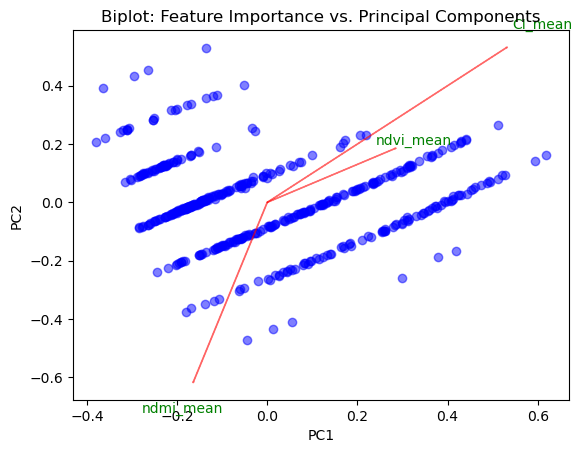

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = df.drop('N', axis=1)
X = X.drop('N_level', axis=1)

# Assume 'df' contains your data (excluding the 'nitrogen' column)
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Perform PCA (choose the desired number of components)
n_components = 3
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(scaled_data)

# Access the loadings (coefficients) for each attribute
loadings_df = pd.DataFrame(pca.components_, columns=X.columns)

# Visualize the results (biplot)
def plot_biplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, c='blue', alpha=0.5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, f"Var{i+1}", color='g', ha='center', va='center')
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')

# Plot the biplot
plot_biplot(reduced_data, loadings_df.values, labels=df.columns)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Biplot: Feature Importance vs. Principal Components')
plt.show()


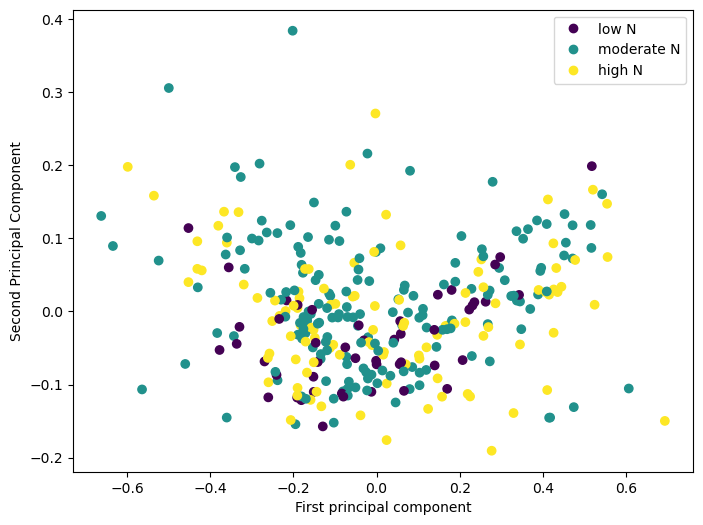

In [29]:
from sklearn.model_selection import cross_val_score, train_test_split

scaler = StandardScaler()

X = df.drop('N', axis=1)
X = X.drop('N_level', axis=1)
y = df['N_level']
scaled_data = scaler.fit_transform(X)
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(scaled_data)  # Fit PCA on the scaled data
loadings_df = pd.DataFrame(pca.components_, columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

from sklearn.decomposition import PCA




X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


plt.figure(figsize=(8,6))
scatter = plt.scatter(X_train[:,1], X_train[:,2], c=y_train, label=y_train)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

# Add legend
plt.legend(handles=scatter.legend_elements()[0], labels=['low N', 'moderate N', 'high N'])

plt.show()
